# Chronic Kidney Disease Dataset Data Cleaning, Data Preparation and Data Visualization

### Import the required library and get the current working directory

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import numpy as np
import pandas as pd
import os

path = os.getcwd()

### Load all the datasets related to CKD challenge test

In [4]:
creatinine = pd.read_csv("T_creatinine.csv")
DBP = pd.read_csv("T_DBP.csv")
demo = pd.read_csv("T_demo.csv")
glucose = pd.read_csv("T_glucose.csv")
HGB = pd.read_csv("T_HGB.csv")
ldl = pd.read_csv("T_ldl.csv")
meds = pd.read_csv("T_meds.csv")
SBP = pd.read_csv("T_SBP.csv")
stage = pd.read_csv("T_stage.csv")
                    
#creatinine = pd.read_csv("https://raw.githubusercontent.com/mritu301/Chronic_Kidney_Disease_Dataset_Challenge_Test/master/dataScienceTask/T_creatinine.csv")
#DBP = pd.read_csv("https://raw.githubusercontent.com/mritu301/Chronic_Kidney_Disease_Dataset_Challenge_Test/master/dataScienceTask/T_DBP.csv?token=AASHKHAXHHB5R33ESVMVRVS6JIH36")
#demo = pd.read_csv("https://raw.githubusercontent.com/mritu301/Chronic_Kidney_Disease_Dataset_Challenge_Test/master/dataScienceTask/T_demo.csv?token=AASHKHDAHL7BEH4LJS34ZOC6JIIOW")
#glucose = pd.read_csv("https://raw.githubusercontent.com/mritu301/Chronic_Kidney_Disease_Dataset_Challenge_Test/master/dataScienceTask/T_glucose.csv?token=AASHKHDXQJK2UJCFEADJQ4K6JIIQM")
#HGB = pd.read_csv("https://raw.githubusercontent.com/mritu301/Chronic_Kidney_Disease_Dataset_Challenge_Test/master/dataScienceTask/T_HGB.csv?token=AASHKHEIJBTIMFSHHEK7MX26JIISY")
#ldl = pd.read_csv("https://raw.githubusercontent.com/mritu301/Chronic_Kidney_Disease_Dataset_Challenge_Test/master/dataScienceTask/T_ldl.csv?token=AASHKHECNBM4L6SYVWIXABC6JIIUO")
#meds = pd.read_csv("https://raw.githubusercontent.com/mritu301/Chronic_Kidney_Disease_Dataset_Challenge_Test/master/dataScienceTask/T_meds.csv?token=AASHKHETBGIOX3J4YMZHADS6JIIWK")
#SBP = pd.read_csv("https://raw.githubusercontent.com/mritu301/Chronic_Kidney_Disease_Dataset_Challenge_Test/master/dataScienceTask/T_SBP.csv?token=AASHKHHHVAWPOJKDGLJA6OC6JIIY6")
#stage = pd.read_csv("https://raw.githubusercontent.com/mritu301/Chronic_Kidney_Disease_Dataset_Challenge_Test/master/dataScienceTask/T_stage.csv?token=AASHKHHHJ4UU4HDBU76F6Q26JII2K")

### All the lab test data, demo, meds and stage_progress data are looking clean as of now

## Now lets do the visualization one by one for each type of dataset

# Lets create a generic method for ploting, data preparation

In [5]:
# this is for plotting purpose
def plot_bar(xasix, yasix, xlabelMsg, ylabelMsg, title, label):
    plt.bar(xasix, yasix, label = ylabelMsg)
    plt.xlabel(xlabelMsg, fontsize=10)
    plt.ylabel(ylabelMsg, fontsize=10)
    plt.xticks(xasix, label, fontsize=10, rotation=30)
    plt.title(title)
    
    plt.legend()
    plt.show()
    
def plot_bar_seaborn(count_column, title, xlabelMsg, ylabelMsg, flag):
    if flag:
        sns.set(rc={'figure.figsize':(25,10)})
    
    plot = sns.countplot(count_column)
    plot.set_title(title)
    plot.set_ylabel(ylabelMsg)
    plot.set_xlabel(xlabelMsg)
    

def prep_lab_test_df(df, lab_test):
    new_df = df.groupby('id', as_index=False).agg(
        no_of_test = ("value", "count"), 
        mean_value = ("value", "mean"), 
        duration_of_test = ("time", sum))

    new_df.insert(loc=0, column='id', value=new_df.index)
    print("Summary of " + lab_test + " lab test below:")
    print(new_df.describe())
    print("\n \nShape of " + lab_test + " lab test below:")
    print(new_df.shape)
    print("\n \nFirst four records of " + lab_test + " lab test below:")
    print(new_df.head())
    return new_df

### 1. Stage Progress visualization

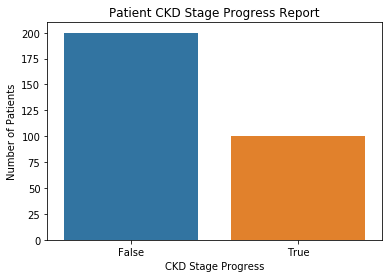

In [6]:
plot_bar_seaborn(stage.Stage_Progress, "Patient CKD Stage Progress Report", "CKD Stage Progress", "Number of Patients", False)

### Observations below for this CKD data:
1. 100 patients are make through the CKD stage progress out of 300 
2. 200 patients are not able to make through this CKD stage progress
3. This data is imm-balance dateset

Solution for impalance dataset:-
    1. over-sampling 
    2. under-sampling

### 2. Demography of CKD patients visualization

### 2.1 Gender Demography for CKD

         race  gender
count     300     300
unique      5       2
top     White  Female
freq      226     176





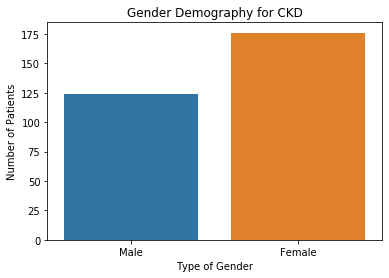

In [7]:
print(demo.describe(include=['object']))
print("\n\n")
plot_bar_seaborn(demo.gender, "Gender Demography for CKD", "Type of Gender", "Number of Patients", False)

### 2.2 Race Demography for CKD

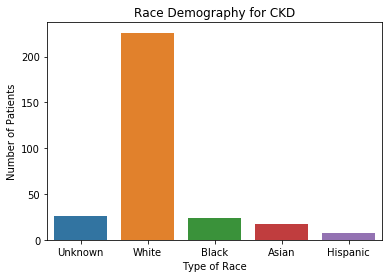

In [8]:
plot_bar_seaborn(demo.race, "Race Demography for CKD", "Type of Race", "Number of Patients", False)

### 2.3 Gender wise, Race Demography for CKD

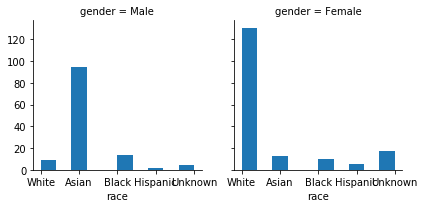

In [9]:
g = sns.FacetGrid(demo, col="gender")
g.map(plt.hist, "race");

### 2.4 Age distribution of CKD patients

(array([  8., 190., 102.]),
 array([ 25,  50,  75, 100]),
 <a list of 3 Patch objects>)

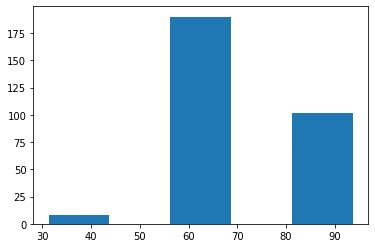

In [10]:
plt.hist(demo.age,rwidth=0.5,bins=[25, 50, 75, 100])

### Observations below for this CKD data for demography below:
1. We have total of 176 female observations and 124 of male
2. We have total of 5 race (White, Black, Asian, Hispanic and unknown)
3. Overall, White race is the highest in number and Hispanic is the least in number
4. In Female, White race is the highest one and in male, Asian race is the highest one
5. we have 8 patients, who are below 50 age
   in between 50 age and 75 age, we have 190 patients and 102 patients are of age more than 75.

### 3. Medicines of CKD patients visualization
##### Summary of meds dataset

In [11]:
meds.describe()

,id,daily_dosage,start_day,end_day
count,2181.000000,2181.000000,2181.000000,2181.000000
mean,144.054562,276.653141,291.254470,370.996332
std,87.194538,478.411077,191.087155,190.575803
min,0.000000,2.000000,-78.000000,-4.000000
25%,68.000000,20.000000,126.000000,208.000000
50%,140.000000,50.000000,290.000000,377.000000
75%,222.000000,320.000000,448.000000,534.000000
max,299.000000,2550.000000,691.000000,698.000000


In [12]:
meds.describe(include=['object'])

,drug
count,2181
unique,21
top,metformin
freq,482


#### We have total 21 different medicines which the doctor have been giving to the CKD patient
#### Out of those, metformin medicines has been prescribed to too many patients 
######  <i>(I think, it should be a significent parameter for CKD stage progress)</i>
<br><br><br>
### <bold> Below is the bar chart of medicines 

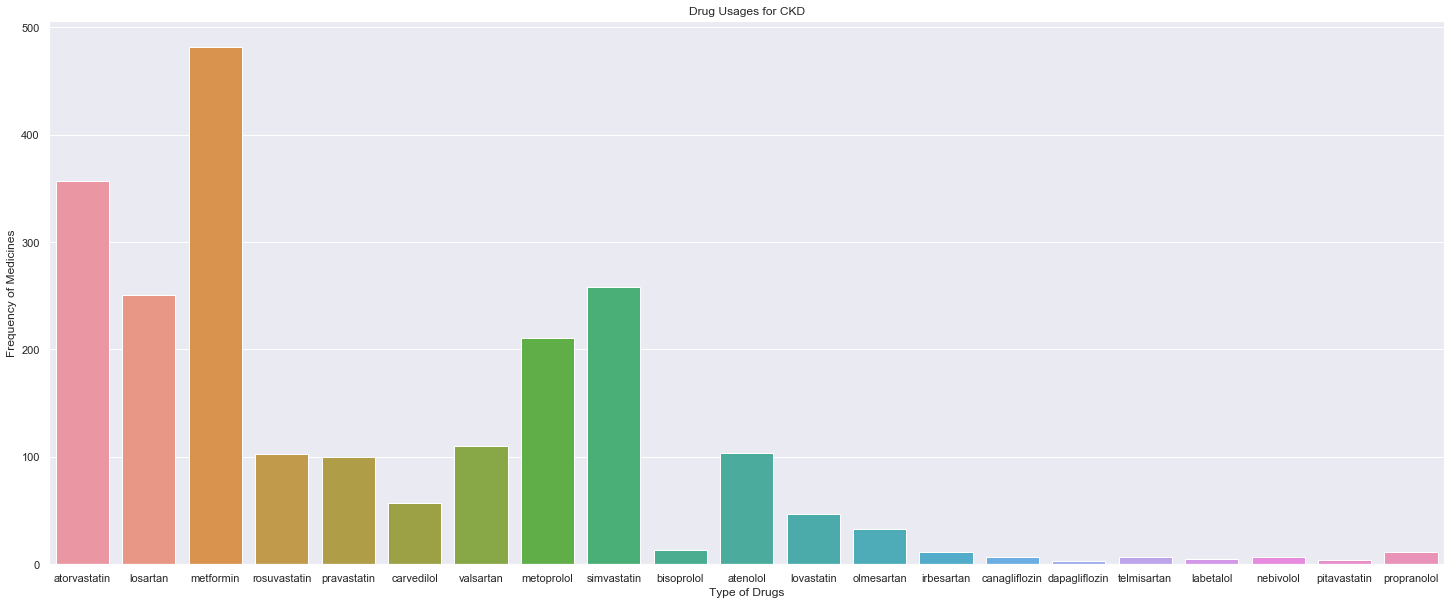

In [13]:
plot_bar_seaborn(meds.drug, "Drug Usages for CKD", "Type of Drugs", "Frequency of Medicines", True)